In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import pandas as pd

import seaborn as sns
import matplotlib as mp
from matplotlib.ticker import FormatStrFormatter

sns.set()

In [3]:
# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
amplitude,length,inputAmplitude,width = datafileread('cz_vpre_final_50V.csv',19)

width *= 1e9
length = np.round(length * 1e9, decimals=1)
inputAmplitude = np.round(amplitude, decimals=1)
#print(inputAmplitude)
width = np.fabs(width)

df = pd.DataFrame({'x': length, 'y': inputAmplitude, 'z': width})
df = df.pivot(index='y',columns='x', values='z')
#print(df)


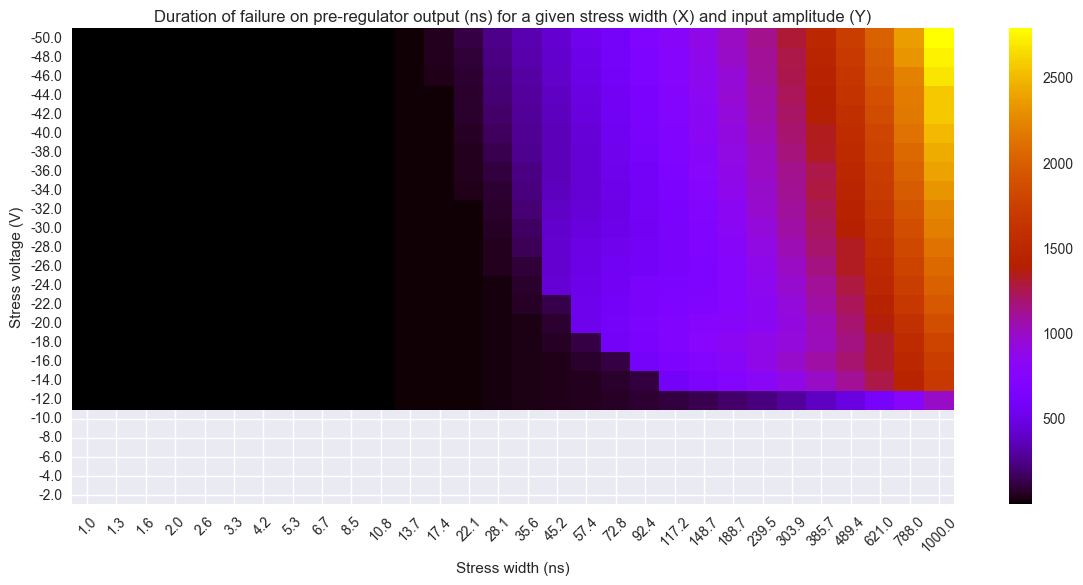

In [5]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(df, cmap='gnuplot')
ax.set_xlabel("Stress width (ns)")
ax.set_ylabel("Stress voltage (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)
    
ax.set_title("Duration of failure on pre-regulator output (ns) for a given stress width (X) and input amplitude (Y)")
plt.plot()
plt.tight_layout()
plt.savefig("preregulator_cz.png", pad_inches=0.3)
plt.show()